In [28]:
import numpy as np
import cv2
from pprint import pprint
import ffmpeg
import sys
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

sys.path.append('../')

from precondition import cut_first_minute, play_sequence, show_frame

In [54]:
filename = "/home/dmitry/work/open_source_stuff/blitz_DS/replay_videos/test_2.mp4"

In [102]:
def threshold_filter(frame, threshold = 200, mode = 'gray'):
    if mode == 'gray':
        return np.tile(np.expand_dims(frame.mean(axis = 2), axis = 2), 3) > threshold
    
def filter_sequence(sequence, filter_function):
    result = np.zeros_like(sequence)
    for i in range(sequence.shape[-1]):
        result[:,:,:,i] = filter_function(sequence[:,:,:,i])
    return result

In [8]:
seq = cut_first_minute(filename)

Battle start frame:  219


In [111]:
play_sequence(seq)

0

In [106]:
filtered = filter_sequence(seq, threshold_filter)

In [104]:
filtered_frame = threshold_filter(test_frame)

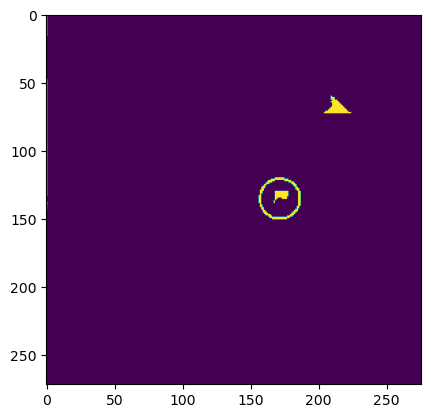

In [105]:
plt.imshow(filtered_frame[:,:,0])
plt.show()

In [110]:
play_sequence(filtered * 255)

0

In [27]:
test_frame = seq[:,:,:,500].copy()

In [42]:
test_frame_gray = test_frame[:,:,:].sum(axis = 2)

In [44]:
test_frame_gray.max()

765

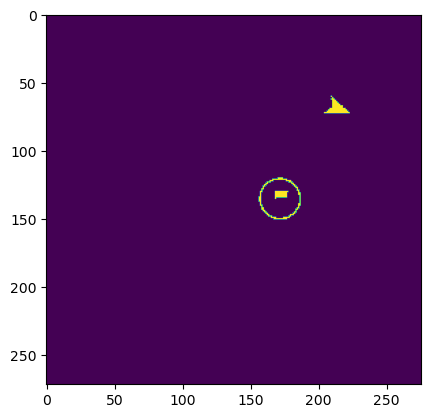

In [52]:
plt.imshow(test_frame_gray > 700)
plt.show()

In [11]:
from scipy.ndimage import gaussian_filter
from sklearn.cluster import KMeans

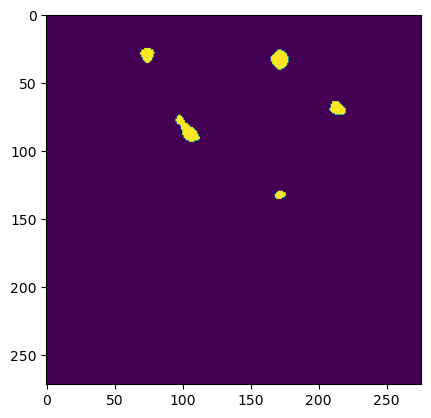

In [12]:
plt.imshow(gaussian_filter((test_frame[:,:,1] > 180).astype(float), sigma = 3) > 0.5)
plt.show()

In [13]:
conditioned = gaussian_filter((test_frame[:,:,1] > 180).astype(float), sigma = 3) > 0.5

In [14]:
test = np.ones_like(conditioned)

In [15]:
for x in range(250):
    for y in range(250):
        if x > y - 30:
            conditioned[x, y] = 0

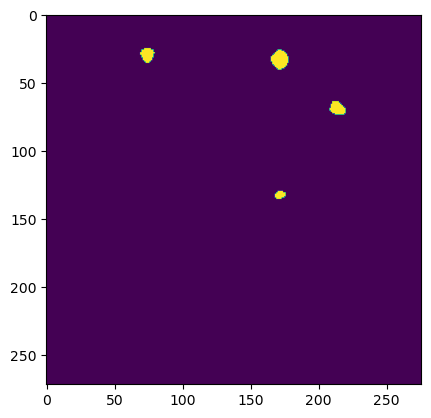

In [16]:
plt.imshow(conditioned)
plt.show()

In [17]:
coords_T = np.where(conditioned > 0)

In [18]:
conditioned.dtype

dtype('bool')

In [19]:
coords = np.transpose(coords_T)

In [20]:
k_means = KMeans(init='k-means++', n_clusters=7, n_init=10)
k_means.fit(coords)
k_means_labels = k_means.labels_

In [21]:
k_means_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 6, 6,
       6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 6, 6, 6, 6,
       6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6,
       6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6,
       6, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 2, 2,
       2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       0, 5, 5, 5, 5, 5, 5, 0, 0, 0, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 5, 5,
       5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0,
       5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0,

In [22]:
result = np.zeros_like(conditioned, dtype = float)
for i, coord in enumerate(coords):
    #print(coord)
    result[coord[0], coord[1]] = k_means_labels[i] + 1

In [23]:
result[coord[0], coord[1]]

4.0

In [24]:
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

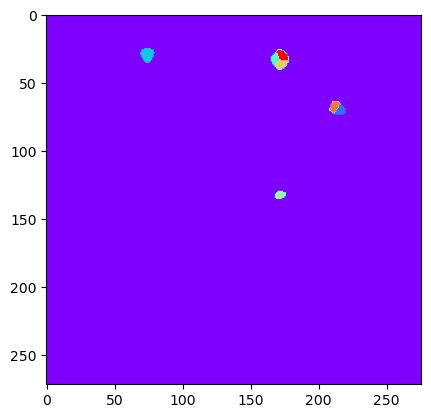

In [25]:
plt.imshow(result, cmap = 'rainbow')
plt.show()

In [ ]:
coords = np.transpose(coords_T)